In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic.csv')

In [ ]:
data.replace('?', np.nan, inplace= True)
data.columns = [col.strip("'") for col in data.columns]
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

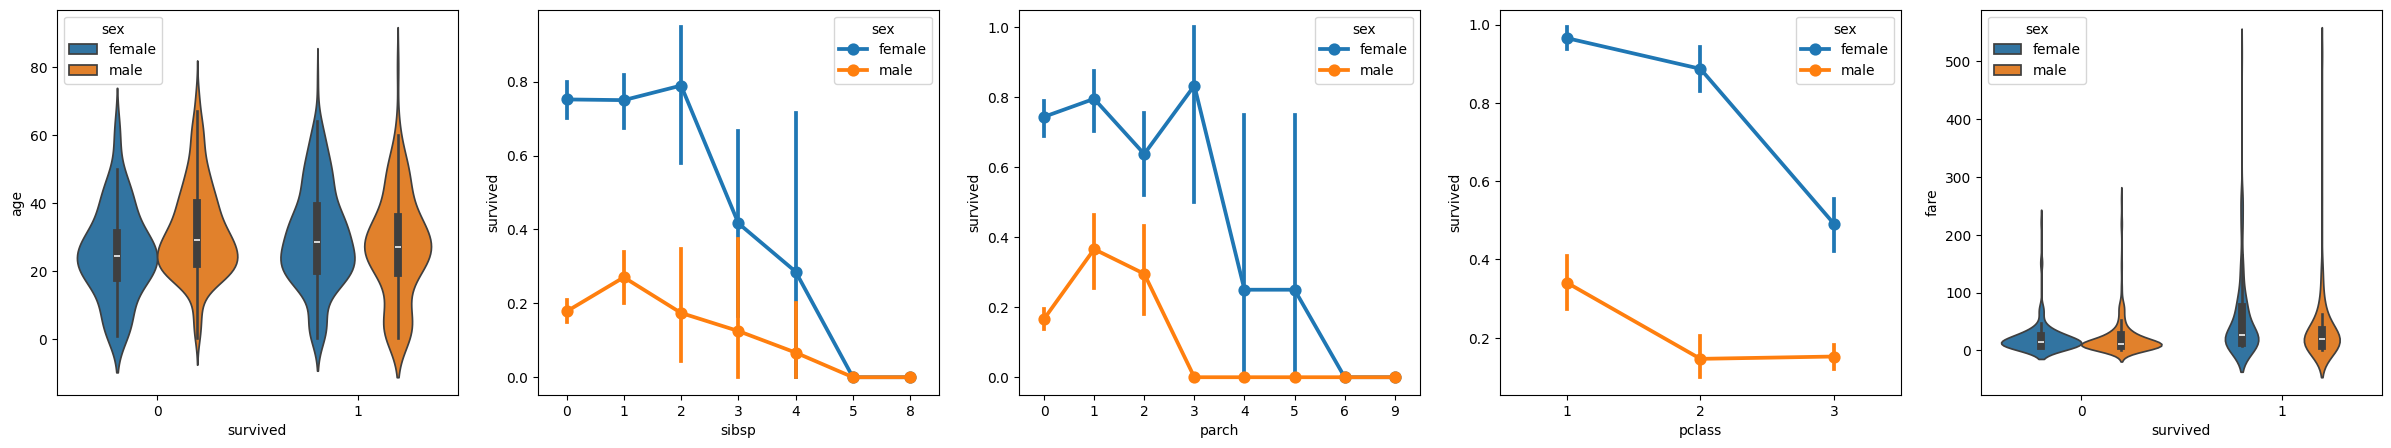

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])


In [16]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr(numeric_only=True).abs()


,id,pclass,survived,sex,age,sibsp,parch,fare
id,1.000000,0.897822,0.293717,0.124599,0.343888,0.065594,0.003584,0.481215
pclass,0.897822,1.000000,0.312469,0.124617,0.408106,0.060832,0.018322,0.558629
survived,0.293717,0.312469,1.000000,0.528693,0.055513,0.027825,0.082660,0.244265
sex,0.124599,0.124617,0.528693,1.000000,0.063646,0.109609,0.213125,0.185523
age,0.343888,0.408106,0.055513,0.063646,1.000000,0.243699,0.150917,0.178739
sibsp,0.065594,0.060832,0.027825,0.109609,0.243699,1.000000,0.373587,0.160238
parch,0.003584,0.018322,0.082660,0.213125,0.150917,0.373587,1.000000,0.221539
fare,0.481215,0.558629,0.244265,0.185523,0.178739,0.160238,0.221539,1.000000


In [17]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]


,survived
id,0.293717
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [18]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()
